In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import numpy as np
from matplotlib import pyplot as plt

In [3]:
from skimage import io

image = io.imread("/home/hre070/MA/DJI_0095_CLIP.jpg")
#image = io.imread('/home/hre070/MA/dji_full.jpg')
#image = io.imread('/home/hre070/MA/Pics_Kalkofen/DJI_0095.JPG')

print(type(image))
print(image.size)



<class 'numpy.ndarray'>
1644300


## LBP

In [244]:
#IMPORTS
import sys
sys.path.append("/home/hre070/MA/TextureSeg/")
sys.path.append("/home/hre070/MA/TextureSeg/_LBP")
import lbp
from skimage.transform import rotate
from skimage.color import label2rgb
from skimage.color import rgb2gray

im_gray = rgb2gray(image)

print(im_gray.max(), im_gray.min())

0.909417254902 0.00666666666667


In [5]:
# settings for LBP
METHOD = 'default'
radius = 5

n_points = 10 

lbp_img = lbp.local_binary_pattern(im_gray, None, n_points, radius, METHOD)


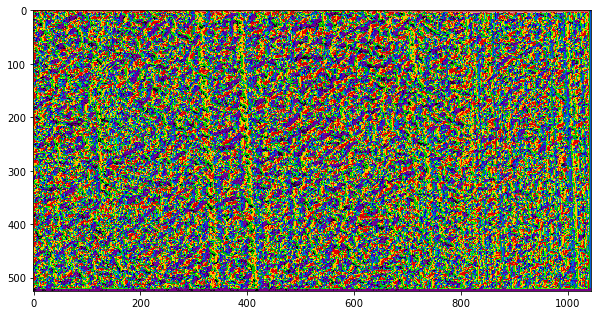

In [6]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp_img, cmap=plt.cm.spectral, alpha=1 )

## Random LBP

In [7]:
import lbp_bins

In [8]:
BINS = lbp_bins.lbp_bins(n_points, METHOD)

lookup = dict(enumerate(BINS))

#print(lookup)
print("="*50)
print(len(np.unique(lbp_img)), len(BINS))

1016 1024


In [9]:
lbp_random = np.vectorize(lookup.__getitem__)(np.random.randint(len(BINS), size=lbp_img.shape))

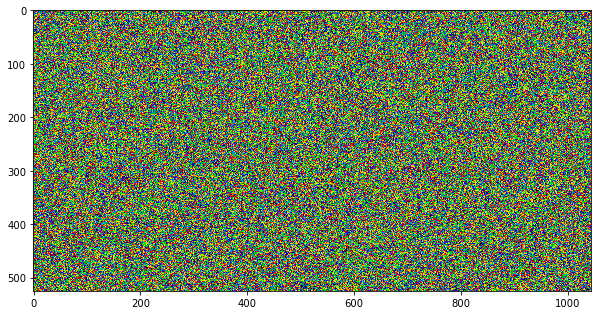

In [10]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp_random, cmap=plt.cm.spectral, alpha=1 )

## Correlation

In [11]:
print(np.corrcoef(lbp_img.flat, lbp_random.flat)[0][1])

-0.000548898579498


In [12]:
bool_array = lbp_img == lbp

In [13]:
type(bool_array)

bool_array[2, 1]

False

## Furier Transform

In [245]:
start = 100
width = 300


end  = start+width

clip = im_gray[start:end, start:end]

In [160]:
clip[150: , :] -= 0.5 

In [221]:
clip = im_gray

In [246]:
from skimage.filters import gaussian

clip = gaussian(clip, sigma=1)


In [252]:


clip += np.random.randint(100, size=clip.shape)/300


In [89]:
import skimage.data as data

In [117]:
clip = data.coins()

In [122]:
clip = np.random.randint(256, size=(200, 200))

In [207]:
clip = np.zeros((200,200), dtype=np.float64)
clip += 0.05
clip[100: , :] += 0.5 
clip[: , ::20] += 0.5 
clip[: , ::21] += 0.5
clip[::10 , ::] += 0.5 


In [178]:
print(clip.max(), clip.min())

0.55 0.05


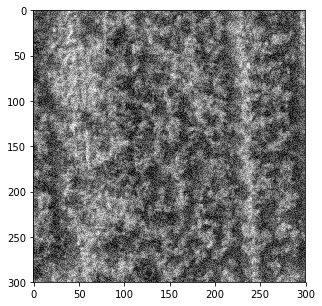

In [253]:
f, ax = plt.subplots(figsize=(5, 5))

#ax.imshow(image)
ax.imshow(clip)

In [254]:
dft = np.fft.fft2(clip)
dft_plot = np.log(np.abs(np.fft.fftshift(dft)))

In [197]:
dft_plot = np.log(np.abs(np.fft.fftshift(dft)))

/home/hre070/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [202]:
dft_plot = np.abs(np.fft.fftshift(dft))

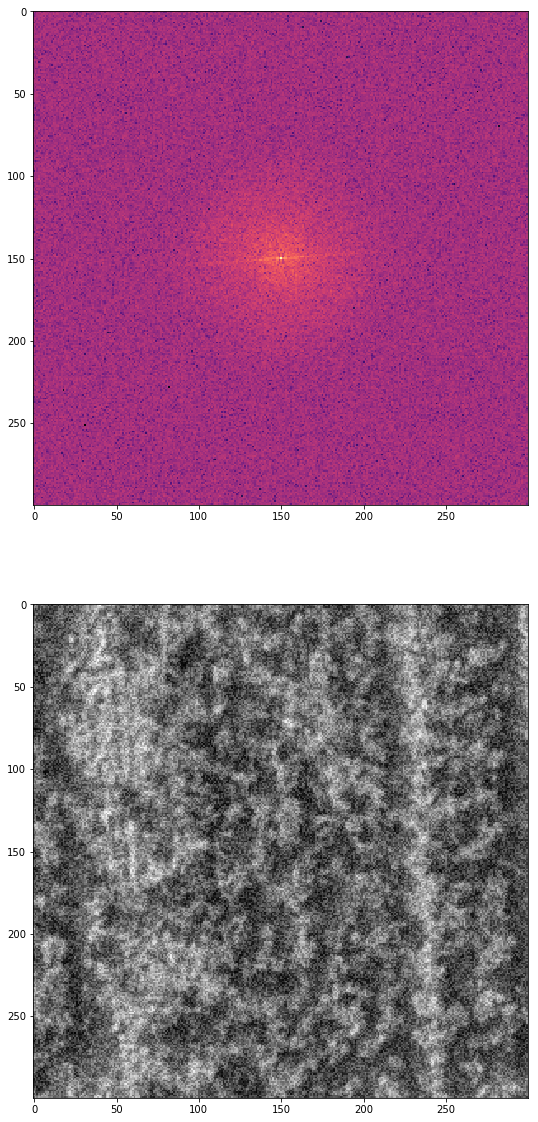

In [255]:
f, ax = plt.subplots(nrows=2, figsize=(15, 20))

#ax.imshow(image)
ax[0].imshow(dft_plot, cmap="magma")
ax[1].imshow(clip)

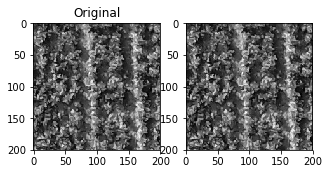

In [70]:
f, ax = plt.subplots(ncols=2, figsize=(5, 5))

#ax.imshow(image)
ax[0].imshow(clip)
ax[0].set_title("Original")
ax[1].imshow(np.abs(np.fft.ifft2(dft)))

## Cross Tabulation